In [84]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
sns.set_style('darkgrid')

In [13]:
df = pd.read_csv(os.path.join("data", "train.csv"), index_col="Id")
df.astype({'Cover_Type': "Int8"}) # typy, typy...
y = df[["Cover_Type"]]
X = df.drop(columns="Cover_Type")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [87]:
feature_names = [*X.columns]

### SVM

In [49]:
svm_model = make_pipeline(StandardScaler(),
                          SGDClassifier())

svm_model.fit(X_train.values,
              y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [55]:
y_pred = svm_model.predict(X_test)

print(svm_model.score(X_test, 
                      y_test))

print(classification_report(y_test, y_pred))

0.6439594356261023
              precision    recall  f1-score   support

           1       0.60      0.50      0.55       620
           2       0.56      0.49      0.52       658
           3       0.53      0.58      0.56       645
           4       0.78      0.90      0.83       661
           5       0.61      0.61      0.61       650
           6       0.51      0.50      0.50       650
           7       0.87      0.92      0.89       652

    accuracy                           0.64      4536
   macro avg       0.64      0.64      0.64      4536
weighted avg       0.64      0.64      0.64      4536



C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Logistic Regression

In [99]:
logistic_regression_model = make_pipeline(StandardScaler(),
                                          SGDClassifier(loss='log_loss'))

logistic_regression_model.fit(X_train.values,
                              y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [100]:
y_pred = logistic_regression_model.predict(X_test)

print(logistic_regression_model.score(X_test, 
                      y_test))

print(classification_report(y_test, y_pred))

0.6624779541446209
              precision    recall  f1-score   support

           1       0.63      0.64      0.63       620
           2       0.55      0.51      0.53       658
           3       0.55      0.52      0.53       645
           4       0.83      0.83      0.83       661
           5       0.61      0.69      0.65       650
           6       0.55      0.58      0.57       650
           7       0.92      0.86      0.89       652

    accuracy                           0.66      4536
   macro avg       0.66      0.66      0.66      4536
weighted avg       0.66      0.66      0.66      4536



C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Random Forest

In [74]:
random_forest_model = make_pipeline(StandardScaler(),
                                    RandomForestClassifier(n_estimators=100))

random_forest_model.fit(X_train.values,
                              y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [75]:
y_pred = random_forest_model.predict(X_test)

print(random_forest_model.score(X_test, 
                      y_test))

print(classification_report(y_test, y_pred))

C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8617724867724867
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       620
           2       0.81      0.68      0.74       658
           3       0.83      0.81      0.82       645
           4       0.92      0.98      0.95       661
           5       0.88      0.95      0.91       650
           6       0.85      0.87      0.86       650
           7       0.95      0.96      0.96       652

    accuracy                           0.86      4536
   macro avg       0.86      0.86      0.86      4536
weighted avg       0.86      0.86      0.86      4536



Text(0, 0.5, 'Mean decrease in impurity')

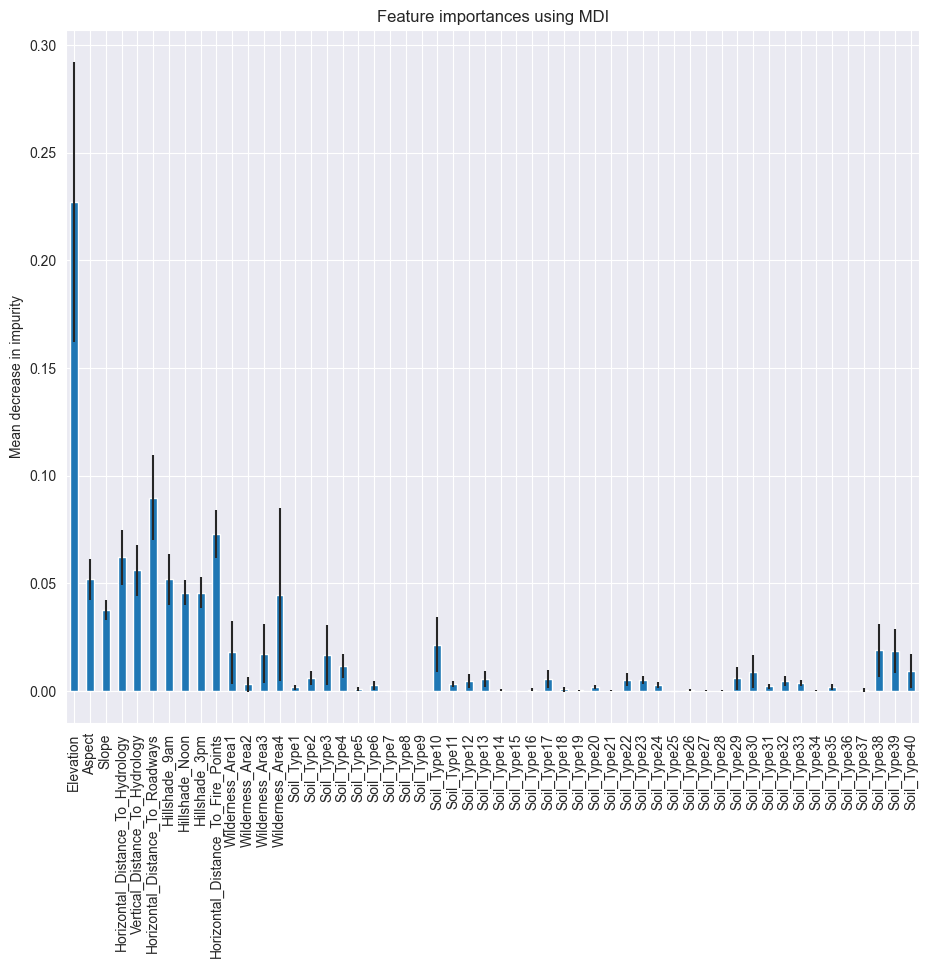

In [94]:
forest = random_forest_model.named_steps['randomforestclassifier']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

f, ax = plt.subplots(figsize=(11, 9))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Neural Network

In [65]:
nn_model = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam', 
                                         alpha=1e-5,
                                         hidden_layer_sizes=(100, 100, 20), # z palca
                                         random_state=42))

nn_model.fit(X_train.values,
             y_train.values.reshape(-1))

C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 20),
                               random_state=42))])

In [66]:
y_pred = nn_model.predict(X_test)

print(nn_model.score(X_test, 
                      y_test))

print(classification_report(y_test, y_pred))

0.841710758377425
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       620
           2       0.73      0.71      0.72       658
           3       0.79      0.79      0.79       645
           4       0.95      0.93      0.94       661
           5       0.91      0.90      0.91       650
           6       0.79      0.85      0.82       650
           7       0.95      0.96      0.96       652

    accuracy                           0.84      4536
   macro avg       0.84      0.84      0.84      4536
weighted avg       0.84      0.84      0.84      4536



C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\asobczak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
